In [1]:
using Pkg
Pkg.activate("..")
#Pkg.develop(["Equilibrium", "IMAS"])
using Revise
using FUSE
using FUSE.IMAS

  Activating environment at `~/.julia/dev/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1317


In [13]:
ϵ = 0.32
κ = 1.7
δ = 0.33
R0 = 6.2
B0 = 5.3
ip = 15.E6
beta_n = 12.0

resolution = 33

dd=IMAS.dd()
FUSE.init(dd.equilibrium, 0.0; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=true)

eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium, 0.0, alpha=0, qstar=1.5)
@time FUSE.step(eqactor)
dd.equilibrium = FUSE.finalize(eqactor, resolution)

eqt = dd.equilibrium.time_slice[1];

  0.737196 seconds (9.14 M allocations: 496.752 MiB, 10.29% gc time, 53.77% compilation time)


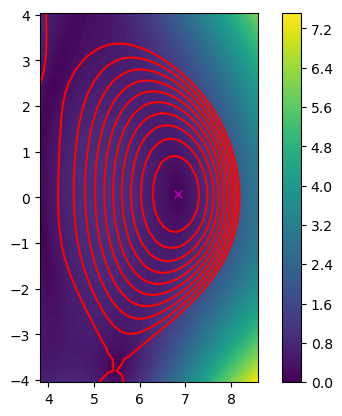

In [14]:
using PyPlot
Bp=sqrt.(eqt.profiles_2d[1].b_field_z.^2.0.+eqt.profiles_2d[1].b_field_r.^2.0)

PyPlot.figure()
CS=PyPlot.contour(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
    transpose(eqt.profiles_2d[1].psi),levels=sort(range(eqt.profiles_1d.psi[1],eqt.profiles_1d.psi[end],length=11)),colors="r")
CS=PyPlot.contourf(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
               transpose(Bp),levels=100)
#PyPlot.scatter(eqt.profiles_2d[1].grid.dim1'.*ones(n),ones(n)'.*eqt.profiles_2d[1].grid.dim2,marker=".",color="r")
PyPlot.plot(eqt.global_quantities.magnetic_axis.r,eqt.global_quantities.magnetic_axis.z,"mx")
PyPlot.gca().set_aspect("equal")
PyPlot.colorbar(CS);

  2.598228 seconds (22.07 M allocations: 821.821 MiB, 3.09% gc time)
513
  0.656214 seconds (6.12 M allocations: 237.027 MiB, 5.00% gc time)
257
  0.219619 seconds (2.06 M allocations: 83.690 MiB, 8.26% gc time)
129
  0.088670 seconds (857.32 k allocations: 36.995 MiB)
65


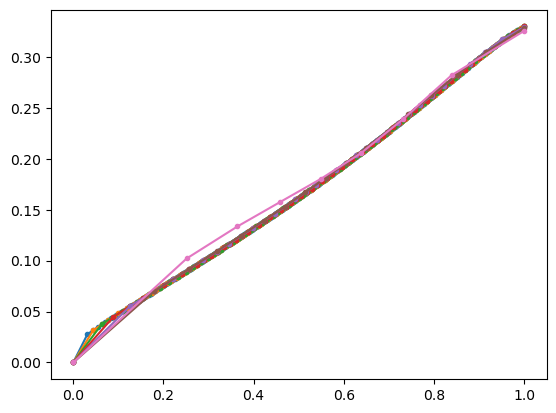

  0.053770 seconds (480.98 k allocations: 21.475 MiB)
33
  0.024214 seconds (262.31 k allocations: 11.965 MiB)
17
  0.025547 seconds (164.56 k allocations: 7.571 MiB)
9


In [16]:
PyPlot.figure()
for res in reverse(Vector{Int}(2.0.^collect(3:9).+1))
    try
        @time eq1=FUSE.finalize(eqactor,res)
        println(res)
        eqt = eq1.time_slice[1]
        PyPlot.plot(eqt.profiles_1d.rho_tor_norm,eqt.profiles_1d.triangularity_upper,".-")
#        PyPlot.axvline(0.95,color="r")
#        PyPlot.plot(0.95,eqt.global_quantities.q_95,"or")
    catch
        rethrow()
    end
end